<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/Module_21_04_qr_code_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QR Code Detection and Decoder using OpenCV and Python

![](https://www.dropbox.com/scl/fi/70vadv3alo2f4re0el6xh/QR-output.jpg?rlkey=oxwl032j7zpooykw4mf3f5kcr&dl=1)


---

This tutorial demonstrates detecting and decoding QR codes using OpenCV and Python. It begins with importing required packages, reading the QR code image, and adjusting the bounding box format for display. A `QRCodeDetector` object is created to detect and decode the QR code, measuring the time taken for this process. Decoded data is printed and displayed along with the rectified QR code image.

### Library Imports
Initially, the necessary packages need to imported into the script.

In [ ]:
# Required packages
import os
import cv2
import numpy as np
import time
import requests
import matplotlib.pyplot as plt

### Download Data
Here we are downloading the data using the `requests` library.

In [ ]:
# Check if the file does not exist before downloading
if not os.path.exists("Barcode.png"):
    # URL of the file to be downloaded
    url = "https://www.dropbox.com/scl/fi/46yuuwybhrf1uayui61jk/QRcode.png?rlkey=lr2nt0b3321vrdlcfr9by1uyt&dl=1"

    # Make a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open a file in binary write mode and save the content of the response
        with open("QRcode.png", "wb") as file:
            file.write(response.content)
    else:
        print("Failed to download the file.")

### Display Input Image
Before trying to decode the QR image, it needs to be read. In the below cell, the directory path to the image is defined. Here, OpenCV's `imread()` method has been used to read the sample image.

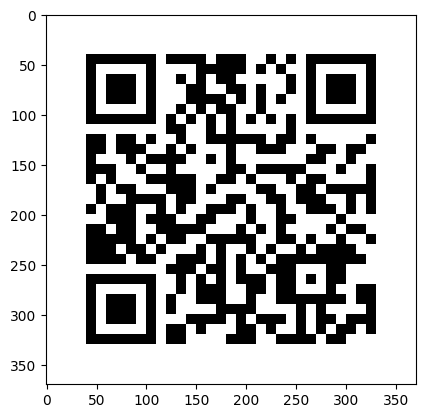

In [ ]:
filepath = 'QRcode.png'
inputImage = cv2.imread(filepath)
plt.imshow(inputImage)
plt.show(block=False)

### Funtion to Display the Output
Ensure that the points in the bbox are converted to the correct format before they are used in the `cv2.rectangle` function. The bbox variable is expected to be a list of points, where each point is a list or tuple of two integers representing the x and y coordinates.

In [ ]:
# Function for correcting the bbox format of qr code detection
def display(im, bbox):
    pt1 = tuple(int(i) for i in bbox[0][0])
    pt2 = tuple(int(i) for i in bbox[0][2])
    cv2.rectangle(im, pt1, pt2, (255, 0, 0), 3)

    plt.imshow(im[...,::-1])
    plt.show()

### QRCode Detection
In the below cells, a new qrCodeDetector() Object has been created to initialize the detector - as shown in the slides. This allows to detect and then decode the QR information as well.

In [ ]:
# Create a qrCodeDetector Object
qrDecoder = cv2.QRCodeDetector()

In [ ]:
# Detect and decode the qrcode
t = time.time()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(inputImage)
print("Time Taken for Detect and Decode : {:.3f} seconds".format(time.time() - t))

Time Taken for Detect and Decode : 0.105 seconds


### Displying the Results
In the end, the informaton decoded from the QR code can be printed.

Decoded Data : https://www.opencv.org/university


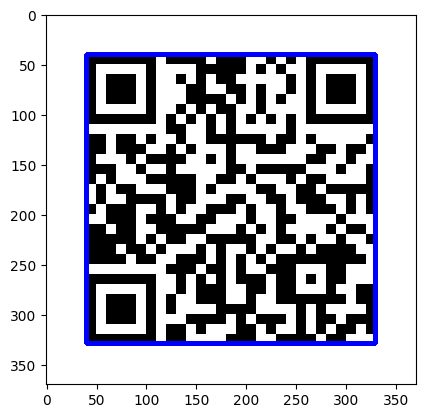

In [ ]:
if len(data)>0:
    print("Decoded Data : {}".format(data))
    display(inputImage, bbox)
    #rectifiedImage = np.uint8(rectifiedImage);
    #plt.imshow(rectifiedImage, 'gray')
else:
    print("QR Code not detected")
    plt.imshow(inputImage)

plt.show(block=False)

### Saving The Results

In [ ]:
cv2.imwrite("QR-output.jpg", inputImage)

True